# Capstone Computer Vision

Dataset :
1. https://www.kaggle.com/datasets/agungmrf/indonesian-sign-language-bisindo
2. https://www.kaggle.com/datasets/idhamozi/indonesian-sign-language-bisindo
3. https://www.kaggle.com/datasets/meisyavira/abjad-bahasa-isyarat-indonesia-bisindo


## Inport Requirements

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
import pickle
import seaborn
import matplotlib.pyplot as plt
import os

import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import LambdaCallback
# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Data Loading

In [2]:
# Menyambngkan dengan file google drive user
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import API key profile keggle
os.makedirs('/root/.kaggle', exist_ok=True)
!cp /content/drive/MyDrive/kaggle/kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/kaggle.json': No such file or directory


### data bisindo  1

In [5]:
!kaggle datasets download -d agungmrf/indonesian-sign-language-bisindo

Dataset URL: https://www.kaggle.com/datasets/agungmrf/indonesian-sign-language-bisindo
License(s): unknown
 99% 1.35G/1.36G [00:09<00:00, 287MB/s]
100% 1.36G/1.36G [00:09<00:00, 153MB/s]


In [6]:
# Melakukan unzip
!unzip /content/indonesian-sign-language-bisindo.zip # bisindo

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: bisindo/labels/train/S/flip039.txt  
  inflating: bisindo/labels/train/S/flip040.txt  
  inflating: bisindo/labels/train/S/flip042.txt  
  inflating: bisindo/labels/train/S/flip043.txt  
  inflating: bisindo/labels/train/S/flip044.txt  
  inflating: bisindo/labels/train/S/flip045.txt  
  inflating: bisindo/labels/train/S/flip046.txt  
  inflating: bisindo/labels/train/S/flip047.txt  
  inflating: bisindo/labels/train/S/flip049.txt  
  inflating: bisindo/labels/train/S/flip050.txt  
  inflating: bisindo/labels/train/S/flip051.txt  
  inflating: bisindo/labels/train/S/flip052.txt  
  inflating: bisindo/labels/train/S/flip053.txt  
  inflating: bisindo/labels/train/S/flip056.txt  
  inflating: bisindo/labels/train/S/flip057.txt  
  inflating: bisindo/labels/train/S/flip058.txt  
  inflating: bisindo/labels/train/S/flip059.txt  
  inflating: bisindo/labels/train/S/flip060.txt  
  inflating: bisindo/labels/train/S/flip0

### bisindo 2

In [7]:
!kaggle datasets download -d idhamozi/indonesian-sign-language-bisindo --force


Dataset URL: https://www.kaggle.com/datasets/idhamozi/indonesian-sign-language-bisindo
License(s): copyright-authors
 99% 884M/890M [00:10<00:00, 44.5MB/s]
100% 890M/890M [00:11<00:00, 82.8MB/s]


In [8]:
# Melakukan unzip
!unzip /content/indonesian-sign-language-bisindo.zip # dataset BISINDO

Archive:  /content/indonesian-sign-language-bisindo.zip
  inflating: Dataset BISINDO/datatest/A/IMG_1151.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1152.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1153.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1154.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1155.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1156.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1157.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1158.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1159.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1160.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1161.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1162.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1163.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1164.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1165.JPG  
  inflating: Dataset BISINDO/datatest/A/IMG_1166.JPG  
  inflating: Dataset BISINDO/datatest/B/IMG_1213.JPG  
  inflati

### bisindo 3

In [9]:
!kaggle datasets download -d meisyavira/abjad-bahasa-isyarat-indonesia-bisindo

Dataset URL: https://www.kaggle.com/datasets/meisyavira/abjad-bahasa-isyarat-indonesia-bisindo
License(s): DbCL-1.0
 61% 94.0M/155M [00:00<00:00, 951MB/s]
100% 155M/155M [00:02<00:00, 57.6MB/s]


In [10]:
# Melakukan unzip
!unzip /content/abjad-bahasa-isyarat-indonesia-bisindo.zip # dataset_merged

Archive:  /content/abjad-bahasa-isyarat-indonesia-bisindo.zip
  inflating: dataset_merged/A/body dot (1).jpg  
  inflating: dataset_merged/A/body dot (2).jpg  
  inflating: dataset_merged/A/body dot (3).jpg  
  inflating: dataset_merged/A/body dot (4).jpg  
  inflating: dataset_merged/A/body white (1).jpg  
  inflating: dataset_merged/A/body white (2).jpg  
  inflating: dataset_merged/A/body white (3).jpg  
  inflating: dataset_merged/A/body white (4).jpg  
  inflating: dataset_merged/A/frame10.jpg  
  inflating: dataset_merged/A/frame11.jpg  
  inflating: dataset_merged/A/frame12.jpg  
  inflating: dataset_merged/A/frame13.jpg  
  inflating: dataset_merged/A/frame14.jpg  
  inflating: dataset_merged/A/frame15.jpg  
  inflating: dataset_merged/A/frame16.jpg  
  inflating: dataset_merged/A/frame4.jpg  
  inflating: dataset_merged/A/frame5.jpg  
  inflating: dataset_merged/A/frame6.jpg  
  inflating: dataset_merged/A/frame7.jpg  
  inflating: dataset_merged/A/frame8.jpg  
  inflating: da

## data distribusi perdataset

### bisindo 1 (bisindo)

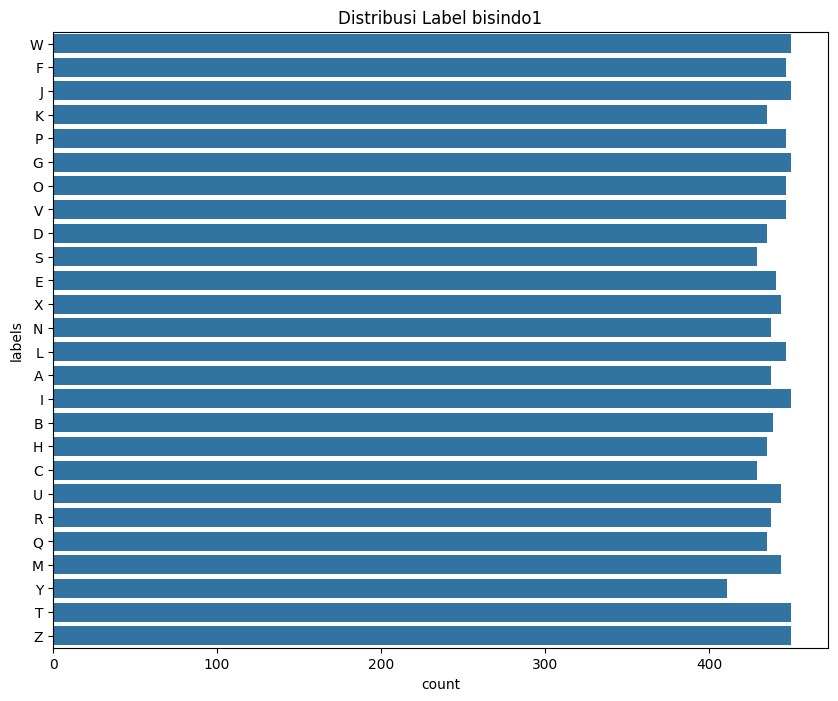

In [11]:
# data distribusi

file_name = []
labels = []
full_path = []

BISINDO_path1 = "bisindo/images"

for path, subdirs, files in os.walk(BISINDO_path1):
    for name in files:
        file_name.append(name)
        labels.append(path.split('/')[-1])
        full_path.append(os.path.join(path, name))

distribusi_train1 = pd.DataFrame({'file_name': file_name, 'labels': labels, 'full_path': full_path})

# plot distribusi
Label1 = distribusi_train1['labels']
plt.figure(figsize=(10, 8))
sns.countplot(Label1)
plt.title('Distribusi Label bisindo1')
plt.show()

In [12]:
# Data distribusi untuk BISINDO_path1
file_name_bisindo1 = []
labels_bisindo1 = []
full_path_bisindo1 = []

# Menetapkan lokasi dari file untuk BISINDO_path1
BISINDO_path1 = "bisindo/images"
for path, subdirs, files in os.walk(BISINDO_path1):
    for name in files:
        file_name_bisindo1.append(name)
        labels_bisindo1.append(path.split('/')[-1])
        full_path_bisindo1.append(os.path.join(path, name))

# Membuat DataFrame untuk BISINDO_path1
df_bisindo1 = pd.DataFrame({"path": full_path_bisindo1, 'file_name': file_name_bisindo1, "labels": labels_bisindo1})

# Menghitung dan menampilkan jumlah data per label untuk BISINDO_path1
print("Jumlah data per label untuk BISINDO_path1:")
print(df_bisindo1.groupby(['labels']).size())

Jumlah data per label untuk BISINDO_path1:
labels
A    438
B    439
C    429
D    435
E    441
F    447
G    450
H    435
I    450
J    450
K    435
L    447
M    444
N    438
O    447
P    447
Q    435
R    438
S    429
T    450
U    444
V    447
W    450
X    444
Y    411
Z    450
dtype: int64


### bisindo 2 (dataset BISINDO)

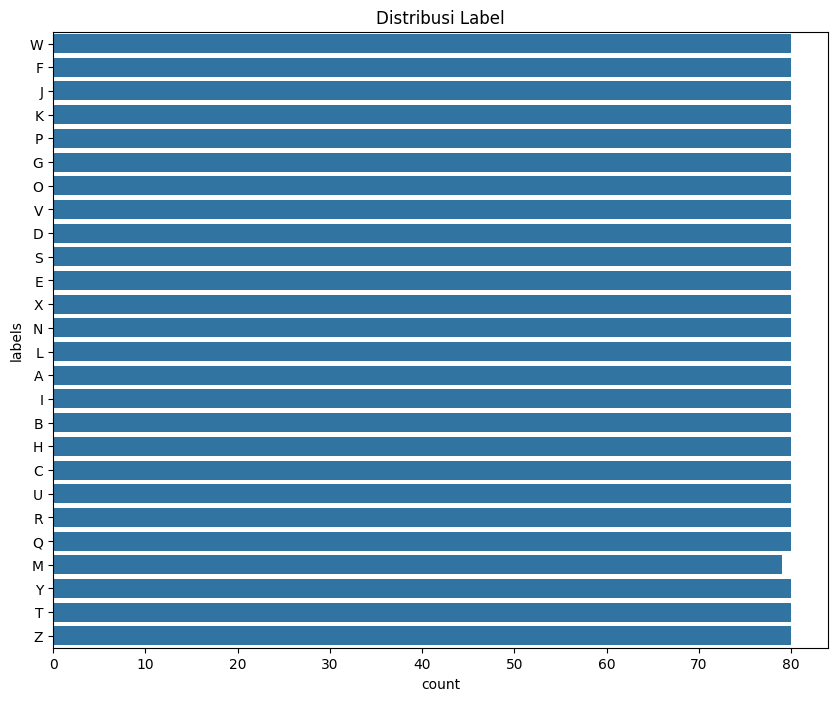

In [13]:
# Data distribusi
file_name = []
labels = []
full_path = []
BISINDO_path2 = "Dataset BISINDO/"

# Menetapkan lokasi dari file
for path_subdirs, dirs, files in os.walk(BISINDO_path2):
    # Mengecualikan folder "NOTHING"
    if 'NOTHING' in dirs:
        dirs.remove('NOTHING')  # Menghapus folder "NOTHING" dari pencarian

    for name in files:
        file_name.append(name)
        labels.append(path_subdirs.split('/')[-1])  # Mengambil nama folder sebagai label
        full_path.append(os.path.join(path_subdirs, name))

# Membuat DataFrame untuk distribusi
distribusi_train2 = pd.DataFrame({'file_name': file_name, 'labels': labels, 'full_path': full_path})

# Plot distribusi setelah menghapus "NOTHING"
Label2 = distribusi_train2['labels']
plt.figure(figsize=(10, 8))
sns.countplot(y=Label2)  # Gunakan y=Label untuk plot horizontal
plt.title('Distribusi Label')
plt.show()


In [14]:
# Data distribusi untuk BISINDO_path2
file_name_bisindo2 = []
labels_bisindo2 = []
full_path_bisindo2 = []

# Menetapkan lokasi dari file untuk BISINDO_path2
BISINDO_path2 = "Dataset BISINDO/"

for path, subdirs, files in os.walk(BISINDO_path2):
    # Mengecualikan folder "NOTHING" jika ada di subdirs
    if 'NOTHING' in subdirs:
        subdirs.remove('NOTHING')

    for name in files:
        if 'NOTHING' not in path.split('/'):
            file_name_bisindo2.append(name)
            labels_bisindo2.append(path.split('/')[-1])  # Mengambil nama folder sebagai label
            full_path_bisindo2.append(os.path.join(path, name))

# Membuat DataFrame untuk BISINDO_path2
df_bisindo2_filtered = pd.DataFrame({"path": full_path_bisindo2, 'file_name': file_name_bisindo2, "labels": labels_bisindo2})

# Menghitung dan menampilkan jumlah data per label untuk BISINDO_path2 yang sudah difilter
print("Jumlah data per label untuk BISINDO_path2 (setelah mengecualikan 'NOTHING'):")
print(df_bisindo2_filtered.groupby(['labels']).size())

Jumlah data per label untuk BISINDO_path2 (setelah mengecualikan 'NOTHING'):
labels
A    80
B    80
C    80
D    80
E    80
F    80
G    80
H    80
I    80
J    80
K    80
L    80
M    79
N    80
O    80
P    80
Q    80
R    80
S    80
T    80
U    80
V    80
W    80
X    80
Y    80
Z    80
dtype: int64


### bisindo 3 (dataset_merged)

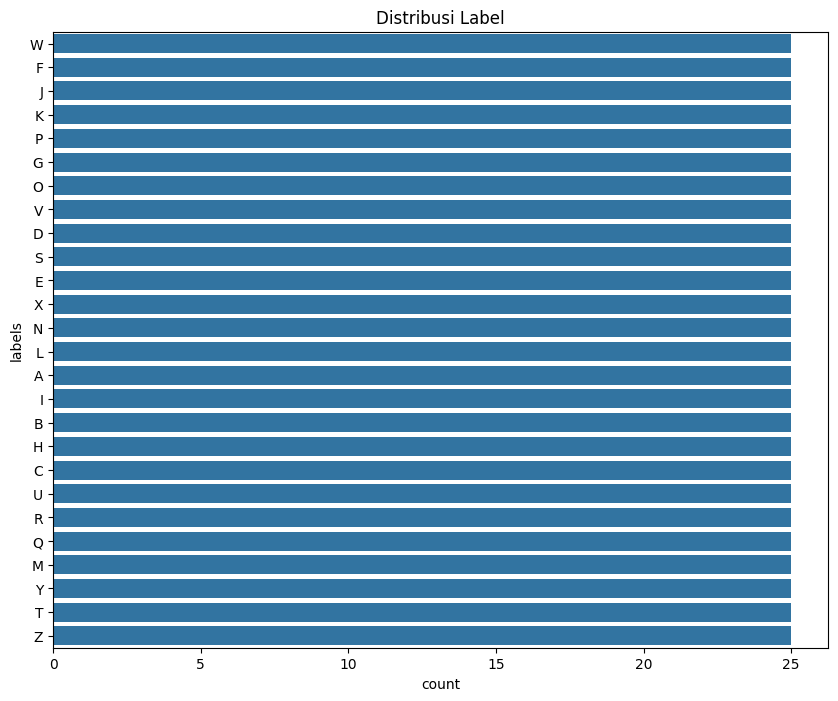

In [15]:
# data distribusi

file_name = []
labels = []
full_path = []

# menertapkan lokasi dari file
BISINDO_path3 = "dataset_merged/"

for path, subdirs, files in os.walk(BISINDO_path3):
    for name in files:
        file_name.append(name)
        labels.append(path.split('/')[-1])
        full_path.append(os.path.join(path, name))

distribusi_train3 = pd.DataFrame({'file_name': file_name, 'labels': labels, 'full_path': full_path})

# plot distribusi
Label3 = distribusi_train3['labels']
plt.figure(figsize=(10, 8))
sns.countplot(Label3)
plt.title('Distribusi Label')
plt.show()

In [16]:
# Data distribusi untuk BISINDO_path3
file_name_bisindo3 = []
labels_bisindo3 = []
full_path_bisindo3 = []

# Menetapkan lokasi dari file untuk BISINDO_path3
BISINDO_path3 = "dataset_merged/"

for path, subdirs, files in os.walk(BISINDO_path3):
    for name in files:
        file_name_bisindo3.append(name)
        labels_bisindo3.append(path.split('/')[-1])  # Mengambil nama folder sebagai label
        full_path_bisindo3.append(os.path.join(path, name))

# Membuat DataFrame untuk BISINDO_path3
df_bisindo3 = pd.DataFrame({"path": full_path_bisindo3, 'file_name': file_name_bisindo3, "labels": labels_bisindo3})

# Menghitung dan menampilkan jumlah data per label untuk BISINDO_path3
print("Jumlah data per label untuk BISINDO_path3:")
print(df_bisindo3.groupby(['labels']).size())

Jumlah data per label untuk BISINDO_path3:
labels
A    25
B    25
C    25
D    25
E    25
F    25
G    25
H    25
I    25
J    25
K    25
L    25
M    25
N    25
O    25
P    25
Q    25
R    25
S    25
T    25
U    25
V    25
W    25
X    25
Y    25
Z    25
dtype: int64


## menggabungkan dataset

In [17]:
import os
import shutil

# Path folder sumber
BISINDO_path1 = "bisindo/images/"
BISINDO_path2 = "Dataset BISINDO/"
BISINDO_path3 = "dataset_merged/"

# Path folder output
combined_path = 'semua-dataset'

# Pastikan folder output ada
os.makedirs(combined_path, exist_ok=True)

# Huruf A-Z
for letter in [chr(i) for i in range(ord('A'), ord('Z')+1)]:
    combined_letter_path = os.path.join(combined_path, letter)
    os.makedirs(combined_letter_path, exist_ok=True)

    # Proses untuk folder bisindo/images (train dan val)
    for source_path in [BISINDO_path1, BISINDO_path2, BISINDO_path3]:
        for subfolder in ['train', 'val', 'datatrain', 'datatest']:  # Iterasi folder  train, val, datatrain, datatest
            letter_source = os.path.join(source_path, subfolder, letter)

            # Mengecualikan folder "NOTHING"
            if 'NOTHING' in letter_source:
                continue

            if os.path.exists(letter_source):
                for file_name in os.listdir(letter_source):
                    source_file = os.path.join(letter_source, file_name)
                    if os.path.isfile(source_file):
                        # Hindari penamaan ganda
                        dest_file = os.path.join(combined_letter_path, f"{subfolder}_{file_name}")
                        shutil.copy2(source_file, dest_file)


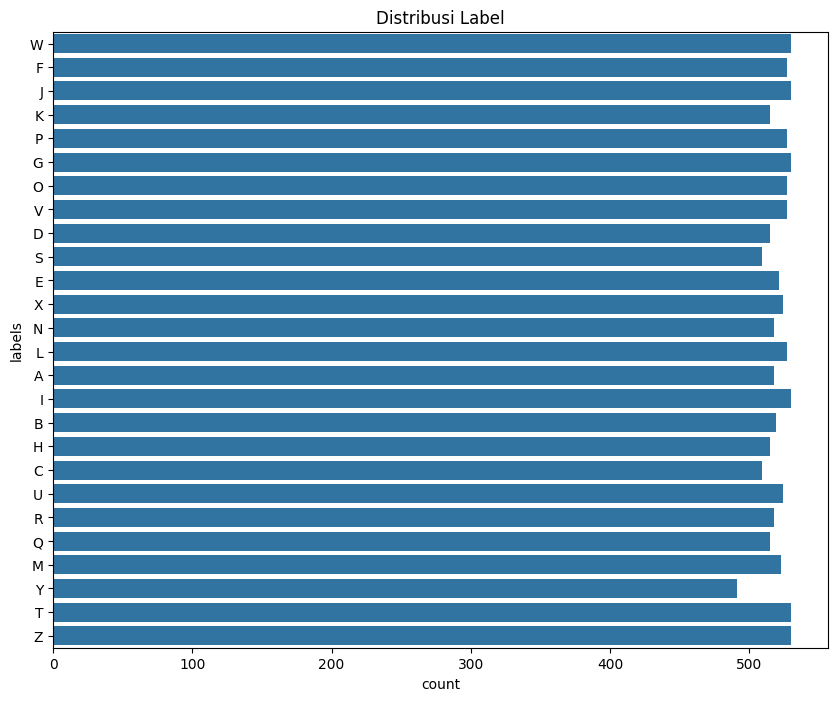

In [18]:
# data distribusi

file_name = []
labels = []
full_path = []

# menertapkan lokasi dari file
all_bisindo = "semua-dataset/"

for path, subdirs, files in os.walk(all_bisindo):
    for name in files:
        file_name.append(name)
        labels.append(path.split('/')[-1])
        full_path.append(os.path.join(path, name))

distribusi_semua_data = pd.DataFrame({'file_name': file_name, 'labels': labels, 'full_path': full_path})

# plot distribusi
Label_semua = distribusi_semua_data['labels']
plt.figure(figsize=(10, 8))
sns.countplot(Label_semua)
plt.title('Distribusi Label')
plt.show()

In [19]:
# Data distribusi untuk semua data
file_name_bisindo_all = []
labels_bisindo_all = []
full_path_bisindo_all = []

# Menetapkan lokasi dari file untuk all_bisindo
all_bisindo = "semua-dataset/"

for path, subdirs, files in os.walk(all_bisindo):
    for name in files:
        file_name_bisindo3.append(name)
        labels_bisindo3.append(path.split('/')[-1])  # Mengambil nama folder sebagai label
        full_path_bisindo3.append(os.path.join(path, name))

# Membuat DataFrame untuk all_bisindo
df_all = pd.DataFrame({"path": full_path_bisindo3, 'file_name': file_name_bisindo3, "labels": labels_bisindo3})

# Menghitung dan menampilkan jumlah data per label untuk all_bisindo
print("Jumlah data per label untuk all_bisindo:")
print(df_all.groupby(['labels']).size())

Jumlah data per label untuk all_bisindo:
labels
A    543
B    544
C    534
D    540
E    546
F    552
G    555
H    540
I    555
J    555
K    540
L    552
M    548
N    543
O    552
P    552
Q    540
R    543
S    534
T    555
U    549
V    552
W    555
X    549
Y    516
Z    555
dtype: int64


## split data

In [20]:
import os
import glob
from sklearn.model_selection import train_test_split
import shutil

# Ambil semua file gambar dari folder per kelas
base_dir = 'semua-dataset'
all_images = []

# Menambahkan semua gambar ke dalam list berdasarkan kelas
for class_dir in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_dir)
    if os.path.isdir(class_path):
        for img_path in glob.glob(os.path.join(class_path, '*.jpg')):
            all_images.append((img_path, class_dir))

train_data, test_data = train_test_split(all_images, test_size=0.2, random_state=42, stratify=[label for _, label in all_images])

# Fungsi untuk menyalin file gambar ke folder tujuan
def copy_files(data, folder_name):
    for img_path, label in data:
        dst_dir = os.path.join('dataset', folder_name, label)
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy(img_path, os.path.join(dst_dir, os.path.basename(img_path)))

copy_files(train_data, 'train')
copy_files(test_data, 'test')


In [21]:
import glob
# Menghitung semua gambar di folder train
data_train = glob.glob('dataset/train/*/*')
print("Total gambar di train:", len(data_train))

# Menghitung semua gambar di folder test
data_test = glob.glob('dataset/test/*/*')
print("Total gambar di test:", len(data_test))

Total gambar di train: 9176
Total gambar di test: 2294


## Data Augmentasi dan Preprocessing


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Konfigurasi
IMG_SIZE = 224
EPOCH = 50
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    shear_range=5,
    horizontal_flip=True,
    zoom_range=0.1
)

# Untuk test dan val
test_val_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = datagen.flow_from_directory(
    directory='dataset/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = test_val_datagen.flow_from_directory(
    directory='dataset/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)


Found 9176 images belonging to 26 classes.
Found 2294 images belonging to 26 classes.


# Callback

In [23]:
# callback akurasi 95
class myCallback(tf.keras.callbacks.Callback):
  def end_epoch(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\n Gacorrrrrrr akurasi telah mencapai >95%!")
      self.model.stop_training = True

callbacks = myCallback()

# Build Model



## Model CNN dengan 3 layer

In [24]:
# model sequential
model = keras.Sequential([

    # layer conv 1 dengan 32
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    # layer conv 2 dengan 64
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    #layer conv 3 dengna 128
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),



    # layer fully connected
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    # 26 kelaz
    layers.Dense(26, activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,987,962 (49.55 MB)

 Trainable params: 12,987,962 (49.55 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
print("Number of classes detected by train_generator:", len(train_generator.class_indices))
print("Class indices mapping:", train_generator.class_indices)

Number of classes detected by train_generator: 26
Class indices mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [26]:
history_cnn = model.fit(
    train_generator,
    epochs=EPOCH,
    validation_data=val_generator,
    callbacks=[callbacks]
    )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 182s 576ms/step - accuracy: 0.0462 - loss: 3.2666 - val_accuracy: 0.1687 - val_loss: 3.0670
Epoch 2/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 146s 507ms/step - accuracy: 0.0949 - loss: 3.0166 - val_accuracy: 0.2511 - val_loss: 2.6141
Epoch 3/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 146s 508ms/step - accuracy: 0.1313 - loss: 2.7774 - val_accuracy: 0.3675 - val_loss: 2.2606
Epoch 4/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 145s 505ms/step - accuracy: 0.1780 - loss: 2.6221 - val_accuracy: 0.4320 - val_loss: 2.2424
Epoch 5/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 144s 503ms/step - accuracy: 0.2056 - loss: 2.5508 - val_accuracy: 0.4834 - val_loss: 2.0854
Epoch 6/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 147s 511ms/step - accuracy: 0.2158 - loss: 2.4944 - val_accuracy: 0.5113 - val_loss: 1.9065
Epoch 7/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 200s 504ms/step - accuracy: 0.2326 - loss: 2.4137 - val_accuracy: 0.5222 - val_loss: 1.7909
Epoch 8/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 145s 505ms/step - accuracy: 0.2383 -

## Grafik Akurasi dan Evaluasi

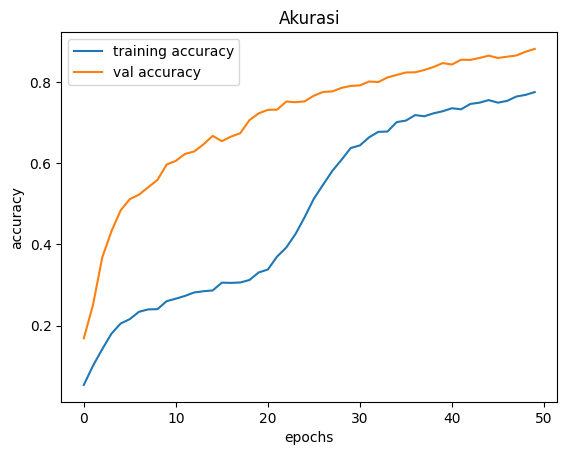

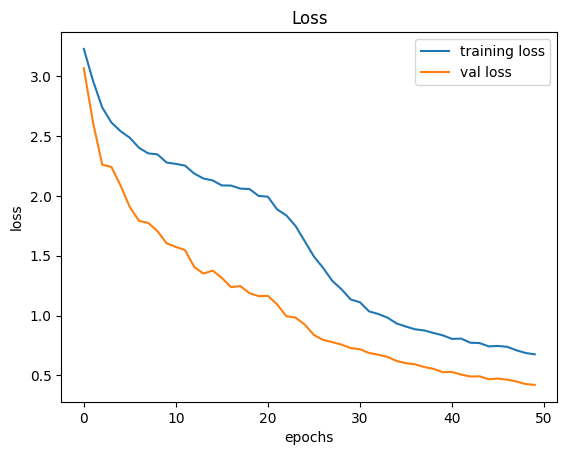

In [27]:
# grafik akurasi dan loss
plt.figure(0)
plt.plot(history_cnn.history['accuracy'], label='training accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='val accuracy')
plt.title('Akurasi')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


plt.figure(1)
plt.plot(history_cnn.history['loss'], label='training loss')
plt.plot(history_cnn.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [28]:
# test val

loss, accuracy = model.evaluate(val_generator)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.8871 - loss: 0.4108
Test Loss: 0.4198
Test Accuracy: 0.8810


72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step


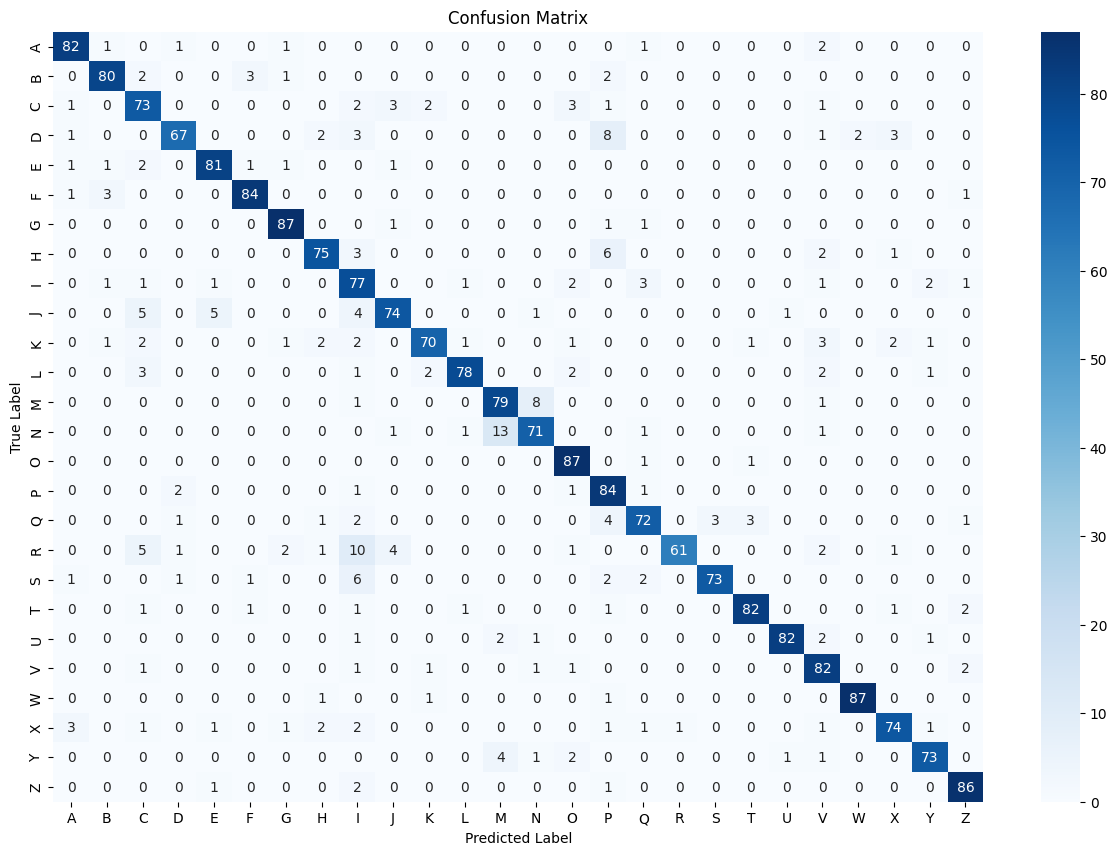

In [29]:
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [30]:
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Classification Report:
              precision    recall  f1-score   support

           A       0.91      0.93      0.92        88
           B       0.92      0.91      0.91        88
           C       0.76      0.85      0.80        86
           D       0.92      0.77      0.84        87
           E       0.91      0.92      0.92        88
           F       0.93      0.94      0.94        89
           G       0.93      0.97      0.95        90
           H       0.89      0.86      0.88        87
           I       0.65      0.86      0.74        90
           J       0.88      0.82      0.85        90
           K       0.92      0.80      0.86        87
           L       0.95      0.88      0.91        89
           M       0.81      0.89      0.84        89
           N       0.86      0.81      0.83        88
           O       0.87      0.98      0.92        89
           P       0.75      0.94      0.84        89
           Q       0.87      0.83      0.85        87
   

### Menyimpan model

In [31]:
model.save('model_bisindo_50epoch.h5')

#### tfjs


In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.33.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
!tensorflowjs_converter --input_format=keras model_bisindo.h5 tfjs_model

2025-06-01 08:46:37.250942: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748767597.283231   11389 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748767597.293247   11389 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


#### tflite

In [ ]:
# saved model
save_path = 'saved_model/'
tf.saved_model.save(model, save_path)

In [ ]:
# konversi ke tflite

keras_model = tf.keras.models.load_model("model_bisindo.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()


with tf.io.gfile.GFile('model_bisindo.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp13gva0he'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  140701945106832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140701945110864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140701945111056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140701789533584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140701789528976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140701789533008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140701789532240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140701789532432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140699914715792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140699914717520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14069991471560

## inference Model

In [36]:
# Muat model yang sudah dilatih
model = load_model('model_bisindo_50epoch.h5')


class_indices = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7,
                 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14,
                 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21,
                 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}
labels = list(class_indices.keys())


def predict_sign_language(image_path, model, labels, img_size):
    img = image.load_img(image_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Buat batch tunggal
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_label = labels[predicted_class_index]
    confidence = np.max(predictions[0])

    return predicted_label, confidence




Saving a.jpg to a.jpg
User uploaded file "a.jpg" with length 95023 bytes


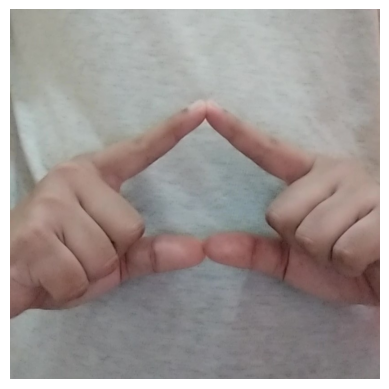

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Gambar: a.jpg
Diprediksi sebagai: A
Dengan keyakinan: 1.00


In [34]:

# Upload file gambar dari lokal
uploaded = files.upload()

# Lakukan prediksi untuk setiap file yang diunggah
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

    # Simpan file yang diunggah ke dalam Colab
    with open(fn, 'wb') as f:
        f.write(uploaded[fn])

    # Tampilkan gambar yang diunggah
    img = plt.imread(fn)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Lakukan prediksi
    predicted_label, confidence = predict_sign_language(fn, model, labels, IMG_SIZE)

    print(f"Gambar: {fn}")
    print(f"Diprediksi sebagai: {predicted_label}")
    print(f"Dengan keyakinan: {confidence:.2f}")

Saving g.jpg to g.jpg
User uploaded file "g.jpg" with length 93749 bytes


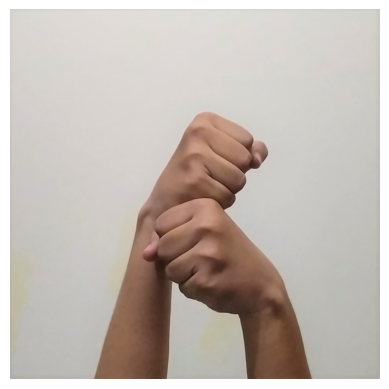

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Gambar: g.jpg
Diprediksi sebagai: G
Dengan keyakinan: 1.00


In [35]:

# Upload file gambar dari lokal
uploaded = files.upload()

# Lakukan prediksi untuk setiap file yang diunggah
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

    # Simpan file yang diunggah ke dalam Colab
    with open(fn, 'wb') as f:
        f.write(uploaded[fn])

    # Tampilkan gambar yang diunggah
    img = plt.imread(fn)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Lakukan prediksi
    predicted_label, confidence = predict_sign_language(fn, model, labels, IMG_SIZE)

    print(f"Gambar: {fn}")
    print(f"Diprediksi sebagai: {predicted_label}")
    print(f"Dengan keyakinan: {confidence:.2f}")

### downlaod model

In [ ]:
# download
def create_complete_model_zip():
    with zipfile.ZipFile('complete_model_files.zip', 'w') as zipf:
        # File individual
        if os.path.exists('model_bisindo.h5'):
            zipf.write('model_bisindo.h5')
        if os.path.exists('model_bisindo.tflite'):
            zipf.write('model_bisindo.tflite')

        # Folder saved_model
        for root, dirs, filenames in os.walk('saved_model'):
            for filename in filenames:
                filepath = os.path.join(root, filename)
                zipf.write(filepath)

        # Folder tfjs_model
        for root, dirs, filenames in os.walk('tfjs_model'):
            for filename in filenames:
                filepath = os.path.join(root, filename)
                zipf.write(filepath)

create_complete_model_zip()
files.download('complete_model_files.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>